In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score
from keras.layers import Dense, Activation
from keras.metrics import  MSE, MAE
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
df =  pd.read_csv("delitos.csv")

In [3]:
df

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,fecha,total procesados,total victima
0,1001,7706,3,40400,2,1,1,3,6,0,0,4,1,1001,05/03/2005,1,1
1,1001,7707,4,10400,3,3,3,3,6,0,3,4,1,1999,09/09/1899,1,1
2,1001,7708,5,40600,2,1,2,3,6,0,1,4,1,1001,06/10/2015,1,1
3,1001,7709,6,30700,1,1,1,3,4,0,2,4,1,1001,15/03/2016,1,2
4,1001,7709,7,60101,1,1,1,3,4,0,2,4,1,1001,15/03/2016,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212225,32056,228318,250880,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1
212226,32056,228318,250881,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1
212227,32056,228318,250882,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1
212228,32056,228318,250883,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1


In [4]:
df.describe()

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio
count,212230.000000,212230.000000,212230.000000,212230.000000,212230.000000,212230.000000,212230.000000,212230.000000,212230.000000,212230.000000,212230.000000,212230.000000,212230.000000,212230.000000
mean,16044.207336,125865.138326,133962.916336,36883.187735,2.680427,2.546435,2.551892,2.768308,5.237280,6.311030,2.539650,3.463431,76.700306,77467.806370
std,4856.138956,58416.926708,65989.188777,25710.962162,0.614334,0.833652,0.816751,0.580809,1.682693,1.893188,1.023106,1.116928,37.099411,37481.601405
min,1001.000000,7706.000000,2.000000,10100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1001.000000
25%,15999.000000,80324.250000,82977.250000,10400.000000,3.000000,3.000000,3.000000,3.000000,6.000000,7.000000,3.000000,4.000000,30.000000,30204.000000
50%,15999.000000,127220.500000,136037.500000,40100.000000,3.000000,3.000000,3.000000,3.000000,6.000000,7.000000,3.000000,4.000000,99.000000,99999.000000
75%,15999.000000,174899.750000,189098.750000,50100.000000,3.000000,3.000000,3.000000,3.000000,6.000000,7.000000,3.000000,4.000000,99.000000,99999.000000
max,32056.000000,228318.000000,250996.000000,91800.000000,3.000000,3.000000,3.000000,3.000000,6.000000,7.000000,3.000000,4.000000,99.000000,99999.000000


In [5]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212230 entries, 0 to 212229
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ubicgeob                 212230 non-null  int64 
 1   cod_expe                 212230 non-null  int64 
 2   cod_deli                 212230 non-null  int64 
 3   delito                   212230 non-null  int64 
 4   calificacion del delito  212230 non-null  int64 
 5   grado consumacion        212230 non-null  int64 
 6   forma de comision        212230 non-null  int64 
 7   forma de accion          212230 non-null  int64 
 8   tipo modalidad           212230 non-null  int64 
 9   elementos comision       212230 non-null  int64 
 10  tipo concurso            212230 non-null  int64 
 11  tipo clasificacion       212230 non-null  int64 
 12  entidad                  212230 non-null  int64 
 13  municipio                212230 non-null  int64 
 14  fecha               

In [6]:
df.head()

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,fecha,total procesados,total victima
0,1001,7706,3,40400,2,1,1,3,6,0,0,4,1,1001,05/03/2005,1,1
1,1001,7707,4,10400,3,3,3,3,6,0,3,4,1,1999,09/09/1899,1,1
2,1001,7708,5,40600,2,1,2,3,6,0,1,4,1,1001,06/10/2015,1,1
3,1001,7709,6,30700,1,1,1,3,4,0,2,4,1,1001,15/03/2016,1,2
4,1001,7709,7,60101,1,1,1,3,4,0,2,4,1,1001,15/03/2016,1,2


In [7]:
df.tail()

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,fecha,total procesados,total victima
212225,32056,228318,250880,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1
212226,32056,228318,250881,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1
212227,32056,228318,250882,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1
212228,32056,228318,250883,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1
212229,32056,228318,250884,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1


In [8]:
df.shape

(212230, 17)

In [9]:
df.isnull().sum()

ubicgeob                   0
cod_expe                   0
cod_deli                   0
delito                     0
calificacion del delito    0
grado consumacion          0
forma de comision          0
forma de accion            0
tipo modalidad             0
elementos comision         0
tipo concurso              0
tipo clasificacion         0
entidad                    0
municipio                  0
fecha                      0
total procesados           0
total victima              0
dtype: int64

In [10]:
df.sort_values(by='fecha' ,ascending=True)

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,fecha,total procesados,total victima
557,1001,8167,562,91100,2,1,3,3,6,0,0,4,1,1001,01/01/1950,1,1
344,1001,7987,347,40100,1,1,1,3,4,7,0,4,1,1001,01/01/1950,3,1
325,1001,7973,328,91100,1,1,3,3,3,0,1,4,1,1001,01/01/1950,4,1
130,1001,7816,133,20100,1,1,1,1,3,7,1,4,1,1001,01/01/1950,3,1
693,1001,8287,698,30700,1,1,1,3,6,2,0,4,1,1001,01/01/1950,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10779,7003,25965,20524,30100,1,1,1,1,3,3,0,1,7,7032,31/12/2015,1,1
5780,2004,17565,10603,40103,1,1,1,2,1,6,3,1,2,2004,31/12/2015,2,1
5305,2004,16712,9852,70100,2,1,1,2,1,6,2,1,2,2004,31/12/2015,1,1
27577,14039,51028,48861,10100,1,1,2,2,3,4,0,1,14,14003,31/12/2018,1,1


In [11]:
df

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,fecha,total procesados,total victima
0,1001,7706,3,40400,2,1,1,3,6,0,0,4,1,1001,05/03/2005,1,1
1,1001,7707,4,10400,3,3,3,3,6,0,3,4,1,1999,09/09/1899,1,1
2,1001,7708,5,40600,2,1,2,3,6,0,1,4,1,1001,06/10/2015,1,1
3,1001,7709,6,30700,1,1,1,3,4,0,2,4,1,1001,15/03/2016,1,2
4,1001,7709,7,60101,1,1,1,3,4,0,2,4,1,1001,15/03/2016,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212225,32056,228318,250880,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1
212226,32056,228318,250881,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1
212227,32056,228318,250882,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1
212228,32056,228318,250883,91800,1,3,1,1,1,1,3,1,32,32999,09/09/1899,1,1


In [12]:
df['total victima'] = df['total victima'].replace({"NSS":0}, regex=True)

In [13]:
df['total procesados'] = df['total procesados'].replace({"NSS":0}, regex=True)

In [14]:
df['total victima'] = df['total victima'].astype(int)


In [15]:
df['total procesados'] = df['total procesados'].astype(int)


In [16]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212230 entries, 0 to 212229
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ubicgeob                 212230 non-null  int64 
 1   cod_expe                 212230 non-null  int64 
 2   cod_deli                 212230 non-null  int64 
 3   delito                   212230 non-null  int64 
 4   calificacion del delito  212230 non-null  int64 
 5   grado consumacion        212230 non-null  int64 
 6   forma de comision        212230 non-null  int64 
 7   forma de accion          212230 non-null  int64 
 8   tipo modalidad           212230 non-null  int64 
 9   elementos comision       212230 non-null  int64 
 10  tipo concurso            212230 non-null  int64 
 11  tipo clasificacion       212230 non-null  int64 
 12  entidad                  212230 non-null  int64 
 13  municipio                212230 non-null  int64 
 14  fecha               

In [17]:
df['fecha'] =  pd.to_datetime(df['fecha'], format='%d/%m/%Y')

<Axes: xlabel='fecha'>

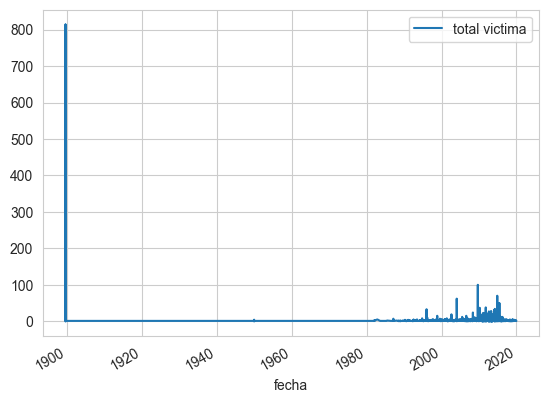

In [18]:
df.plot('fecha', 'total victima')

In [19]:
df['total victima'].describe()

count    212230.000000
mean          0.360383
std           2.587881
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         814.000000
Name: total victima, dtype: float64

In [24]:
df3

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,fecha,total procesados,total victima
0,1001,7706,3,40400,2,1,1,3,6,0,0,4,1,1001,2005-03-05,1,1
2,1001,7708,5,40600,2,1,2,3,6,0,1,4,1,1001,2015-10-06,1,1
3,1001,7709,6,30700,1,1,1,3,4,0,2,4,1,1001,2016-03-15,1,2
4,1001,7709,7,60101,1,1,1,3,4,0,2,4,1,1001,2016-03-15,1,2
7,1001,7712,10,40600,2,1,2,3,6,0,0,4,1,1001,2015-08-30,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212220,32056,228316,250931,70900,1,3,3,3,6,7,3,1,32,32056,2015-01-15,3,1
212221,32056,228316,250932,70900,1,3,3,3,6,7,3,1,32,32056,2015-01-15,3,1
212222,32056,228316,250933,70900,1,3,3,3,6,7,3,1,32,32056,2015-01-15,3,1
212223,32056,228317,250936,70900,1,3,3,3,6,7,3,1,32,32056,2012-05-15,2,1


In [23]:
df3 = df[df['fecha'] > '1980-01-01']

In [ ]:
df3.plot('fecha','total victima')

In [25]:
df3.describe()

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,fecha,total procesados,total victima
count,40744.000000,40744.000000,40744.000000,40744.000000,40744.000000,40744.000000,40744.000000,40744.000000,40744.000000,40744.000000,40744.000000,40744.000000,40744.000000,40744.000000,40744,40744.000000,40744.000000
mean,15022.135357,90555.966817,93554.703588,41492.227052,1.737679,1.270764,1.271574,1.988587,2.841425,4.153814,1.107991,1.716572,15.025255,15107.351316,2013-05-23 23:37:39.807578880,1.653053,1.248012
min,1001.000000,7706.000000,3.000000,10100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1001.000000,1980-01-09 00:00:00,0.000000,0.000000
25%,11042.000000,32285.750000,27625.750000,20700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,11.000000,11037.000000,2012-11-15 00:00:00,1.000000,1.000000
50%,13077.000000,45756.500000,42862.500000,40300.000000,2.000000,1.000000,1.000000,2.000000,2.000000,6.000000,0.000000,1.000000,13.000000,13077.000000,2014-06-19 00:00:00,1.000000,1.000000
75%,21114.000000,207300.250000,225319.250000,50200.000000,2.000000,1.000000,1.000000,3.000000,4.000000,7.000000,2.000000,3.000000,21.000000,21114.000000,2015-06-25 00:00:00,1.000000,1.000000
max,32056.000000,228317.000000,250989.000000,91800.000000,3.000000,3.000000,3.000000,3.000000,6.000000,7.000000,3.000000,4.000000,99.000000,99999.000000,2019-12-28 00:00:00,93.000000,100.000000
std,9193.200155,83545.838455,94551.581831,23159.850563,0.558097,0.668742,0.595371,0.833715,2.034545,2.880121,1.259467,1.164553,9.395768,9436.090282,NaN,4.600885,1.304892


In [26]:
df3.corr()

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,fecha,total procesados,total victima
ubicgeob,1.000000,0.920841,0.921005,-0.132145,-0.005249,0.405702,-0.022819,-0.073280,0.077221,0.140176,0.303702,0.075956,0.978847,0.978322,-0.226177,-0.053054,0.033357
cod_expe,0.920841,1.000000,0.999992,-0.105190,-0.018380,0.376385,0.029853,0.050159,0.141027,0.077280,0.351844,0.144858,0.901161,0.902387,-0.197709,-0.030738,0.029408
cod_deli,0.921005,0.999992,1.000000,-0.105167,-0.018328,0.377897,0.030111,0.050203,0.141153,0.076922,0.352152,0.144646,0.901326,0.902545,-0.197569,-0.030757,0.029362
delito,-0.132145,-0.105190,-0.105167,1.000000,0.204370,-0.030768,-0.010679,0.276300,-0.105178,-0.012879,-0.105575,0.039699,-0.129184,-0.129746,0.138837,-0.009653,-0.028349
calificacion del delito,-0.005249,-0.018380,-0.018328,0.204370,1.000000,0.119683,0.239445,0.305211,-0.103666,0.091006,-0.019966,0.152065,-0.000117,-0.001293,0.135852,-0.096161,-0.006513
grado consumacion,0.405702,0.376385,0.377897,-0.030768,0.119683,1.000000,0.320063,0.111812,0.196312,0.003506,0.312933,0.201442,0.400576,0.399386,-0.009917,0.112625,-0.017384
forma de comision,-0.022819,0.029853,0.030111,-0.010679,0.239445,0.320063,1.000000,0.280726,0.198565,0.059488,0.160226,0.221359,-0.016319,-0.014345,0.099645,0.120398,-0.004431
forma de accion,-0.073280,0.050159,0.050203,0.276300,0.305211,0.111812,0.280726,1.000000,0.200439,0.035474,0.092358,0.297394,-0.067886,-0.062951,0.092535,0.029681,-0.022260
tipo modalidad,0.077221,0.141027,0.141153,-0.105178,-0.103666,0.196312,0.198565,0.200439,1.000000,-0.020801,0.250434,0.311194,0.076597,0.082600,-0.088865,0.088332,-0.001623
elementos comision,0.140176,0.077280,0.076922,-0.012879,0.091006,0.003506,0.059488,0.035474,-0.020801,1.000000,0.172947,0.118630,0.139476,0.143116,-0.028412,0.016665,0.008338


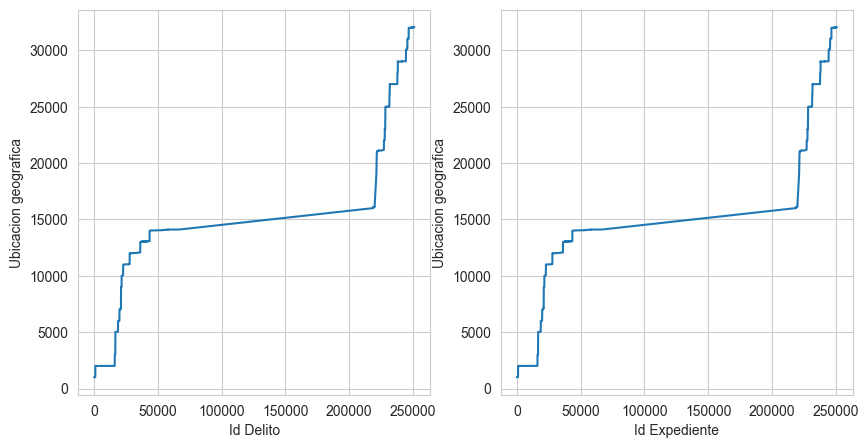

In [29]:
fig, ax =  plt.subplots(1,2, figsize=(10,5))
ax[0].set_xlabel("Id Delito")
ax[0].set_ylabel("Ubicacion geografica")
ax[0].plot(df3['cod_deli'],df3['ubicgeob'])


ax[1].set_xlabel("Id Expediente")
ax[1].set_ylabel("Ubicacion geografica")
ax[1].plot(df3['cod_deli'],df3['ubicgeob'])

In [39]:
pdf = df3.to_csv("datos.csv")
pdf

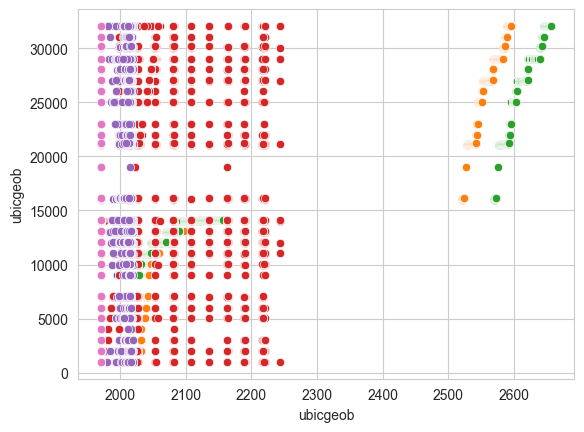

In [41]:
for i in df3:
    sns.scatterplot(data=df3, x=i, y='ubicgeob')

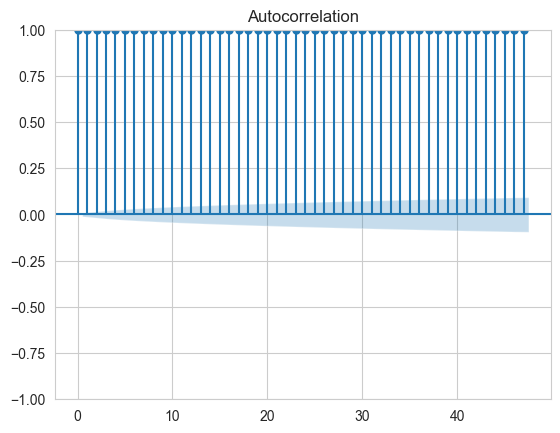

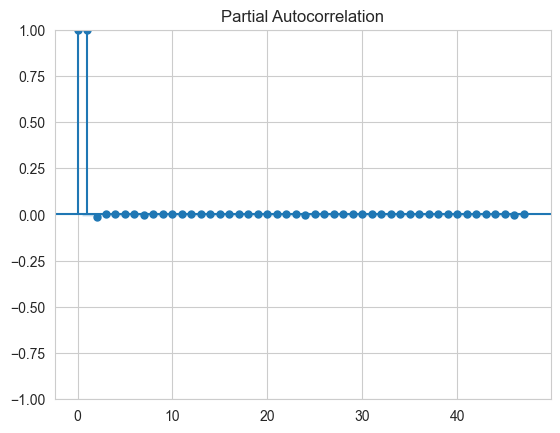

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df3['ubicgeob'])
plot_pacf(df3['ubicgeob'])
plt.show()

In [49]:
from statsmodels.tsa.arima.model import ARIMA

# Supongamos que los órdenes son p=1, d=1, q=1
model = ARIMA(df3['ubicgeob'], order=(1, 1, 1))
model_fit = model.fit()


C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='cod_deli'>

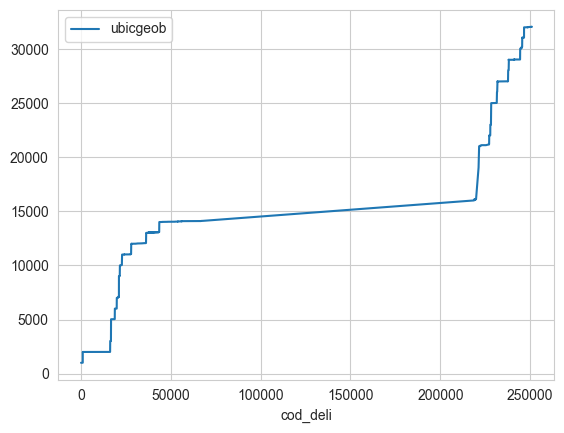

In [28]:
df3.plot('cod_deli', 'ubicgeob')

In [52]:
X = df3[['cod_deli','cod_expe']]
y =  df3['ubicgeob']

ValueError: Columns must be same length as key

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error, mean_absolute_error
from sklearn.model_selection  import train_test_split

In [ ]:
#metodos ARIMA, RN

<Axes: >

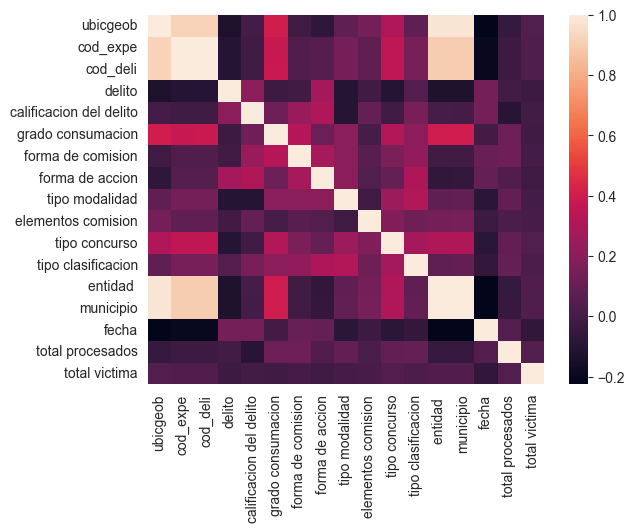

In [63]:
sns.heatmap(df3.corr())

In [18]:
df2 =  df

In [19]:
df2.drop(columns='fecha', inplace=True)

In [28]:
df2.head(20)

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,total procesados,total victima
0,1001,7706,3,40400,2,1,1,3,6,0,0,4,1,1001,1,1
1,1001,7707,4,10400,3,3,3,3,6,0,3,4,1,1999,1,1
2,1001,7708,5,40600,2,1,2,3,6,0,1,4,1,1001,1,1
3,1001,7709,6,30700,1,1,1,3,4,0,2,4,1,1001,1,2
4,1001,7709,7,60101,1,1,1,3,4,0,2,4,1,1001,1,2
5,1001,7710,8,10100,3,3,3,3,6,0,3,1,1,1999,1,1
6,1001,7711,9,40100,3,3,1,3,6,0,3,4,1,1999,4,2
7,1001,7712,10,40600,2,1,2,3,6,0,0,4,1,1001,1,1
8,1001,7712,11,10400,2,1,2,3,6,0,0,4,1,1001,1,1
9,1001,7713,12,40100,3,3,1,3,6,0,3,4,1,1999,6,1


In [31]:
df.columns

Index(['ubicgeob', 'cod_expe', 'cod_deli', 'delito', 'calificacion del delito',
       'grado consumacion', 'forma de comision', 'forma de accion',
       'tipo modalidad', 'elementos comision', 'tipo concurso',
       'tipo clasificacion', 'entidad ', 'municipio', 'total procesados',
       'total victima'],
      dtype='object')

<Axes: >

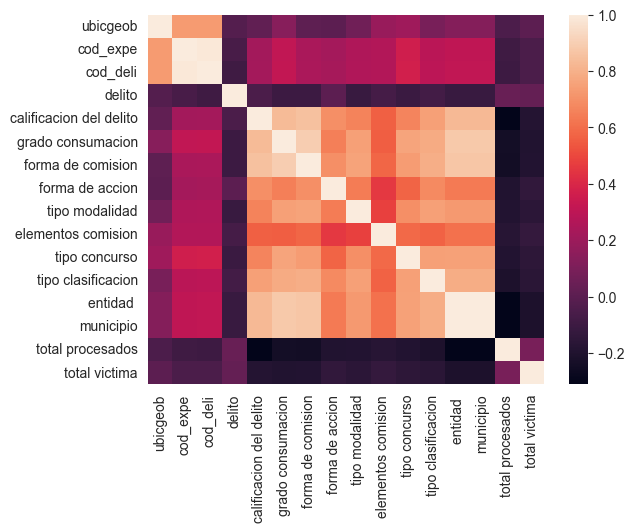

In [30]:
sns.heatmap(df.corr())

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Paso 1: Carga y exploración de datos
url = "https://raw.githubusercontent.com/joshtorres07/BEDUDS/main/datos.csv"
df = pd.read_csv(url)

# Paso 2: Preprocesamiento de datos (si es necesario)
# Si es necesario, maneja valores faltantes, codifica variables categóricas y escala variables numéricas aquí.

# Paso 3: División de Datos
X = df3[['cod_expe', 'cod_deli']]
y = df3['ubicgeob']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Selección del Modelo
model = RandomForestClassifier(n_estimators=200)

# Paso 5: Entrenamiento del Modelo
model.fit(X_train, y_train)

# Paso 6: Evaluación del Modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Paso 7: Afinación del Modelo (si es necesario)
# Puedes ajustar hiperparámetros y realizar selección de características aquí.

# Paso 8: Implementación en Producción
# Cuando estés satisfecho con el modelo, puedes implementarlo en producción para realizar predicciones en nuevos datos.


Accuracy: 0.99742299668671
Confusion Matrix:
 [[79  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0 36]]
Classification Report:
               precision    recall  f1-score   support

        1001       1.00      1.00      1.00        79
        1003       1.00      1.00      1.00         2
        1005       1.00      1.00      1.00         3
        1007       1.00      1.00      1.00         3
        2001       1.00      1.00      1.00       186
        2002       1.00      1.00      1.00       255
        2003       1.00      1.00      1.00        36
        2004       1.00      1.00      1.00       752
        2005       1.00      1.00      1.00        20
        3003       1.00      1.00      1.00        10
        3008       1.00      1.00      1.00        63
        4002       1.00      1.00      1.00         2
        4003       0.00      0.00      0.00         0
        4009     

C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [21]:
X = df2[3:]

In [22]:
y = df2['cod_deli']

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,total procesados,total victima
3,1001,7709,6,30700,1,1,1,3,4,0,2,4,1,1001,1,2
4,1001,7709,7,60101,1,1,1,3,4,0,2,4,1,1001,1,2
5,1001,7710,8,10100,3,3,3,3,6,0,3,1,1,1999,1,1
6,1001,7711,9,40100,3,3,1,3,6,0,3,4,1,1999,4,2
7,1001,7712,10,40600,2,1,2,3,6,0,0,4,1,1001,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212225,32056,228318,250880,91800,1,3,1,1,1,1,3,1,32,32999,1,1
212226,32056,228318,250881,91800,1,3,1,1,1,1,3,1,32,32999,1,1
212227,32056,228318,250882,91800,1,3,1,1,1,1,3,1,32,32999,1,1
212228,32056,228318,250883,91800,1,3,1,1,1,1,3,1,32,32999,1,1


In [49]:
df['fecha'] = df['fecha'].astype(str)

In [50]:
df['fecha'] =  pd.to_datetime(df['fecha'], format='%d/%m/%Y')

In [52]:
df['year'] = df['fecha'].dt.year.astype(float)

In [54]:
df.year

0         2005.0
1         1899.0
2         2015.0
3         2016.0
4         2016.0
           ...  
212225    1899.0
212226    1899.0
212227    1899.0
212228    1899.0
212229    1899.0
Name: year, Length: 212230, dtype: float64

In [57]:
df.groupby(by='fecha').sum()

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,total procesados,total victima,year
fecha,,,,,,,,,,,,,,,,,
1899-09-09,2792835113,23021454180,24618634019,6132551678,497907,488541,489645,506289,995320,1169957,493770,664697,15665752,15825281526,26988,25508,325446822.0
1900-01-22,32010,226491,247487,70900,2,3,1,3,1,0,3,3,32,32010,1,1,1900.0
1950-01-01,104109,835556,41260,4475956,152,107,128,196,403,169,66,395,104,115087,151,123,202800.0
1971-08-21,2001,9805,2437,40600,3,1,3,3,6,7,1,1,2,2001,1,1,1971.0
1974-10-05,25006,210517,229646,10100,1,1,1,3,6,7,3,4,25,25999,1,1,1974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10,28021,218398,237799,40400,2,1,2,3,2,7,3,4,28,28021,1,1,2019.0
2019-12-13,28032,218464,237917,30700,2,3,1,3,2,7,3,3,28,28032,1,1,2019.0
2019-12-16,84096,655395,713646,61500,6,3,3,3,9,21,9,6,84,84096,9,3,6057.0


In [33]:
df[df['total victima'] >400]

,ubicgeob,cod_expe,cod_deli,delito,calificacion del delito,grado consumacion,forma de comision,forma de accion,tipo modalidad,elementos comision,tipo concurso,tipo clasificacion,entidad,municipio,fecha,total procesados,total victima
15928,12028,36060,31923,40300,2,1,2,2,1,6,1,3,12,12028,09/09/1899,6,426
15929,12028,36060,31924,70700,2,1,1,2,1,6,1,3,12,12028,09/09/1899,6,426
16209,12029,37240,33192,40300,1,1,1,3,3,0,0,3,12,12029,09/09/1899,6,814


<BarContainer object of 212230 artists>

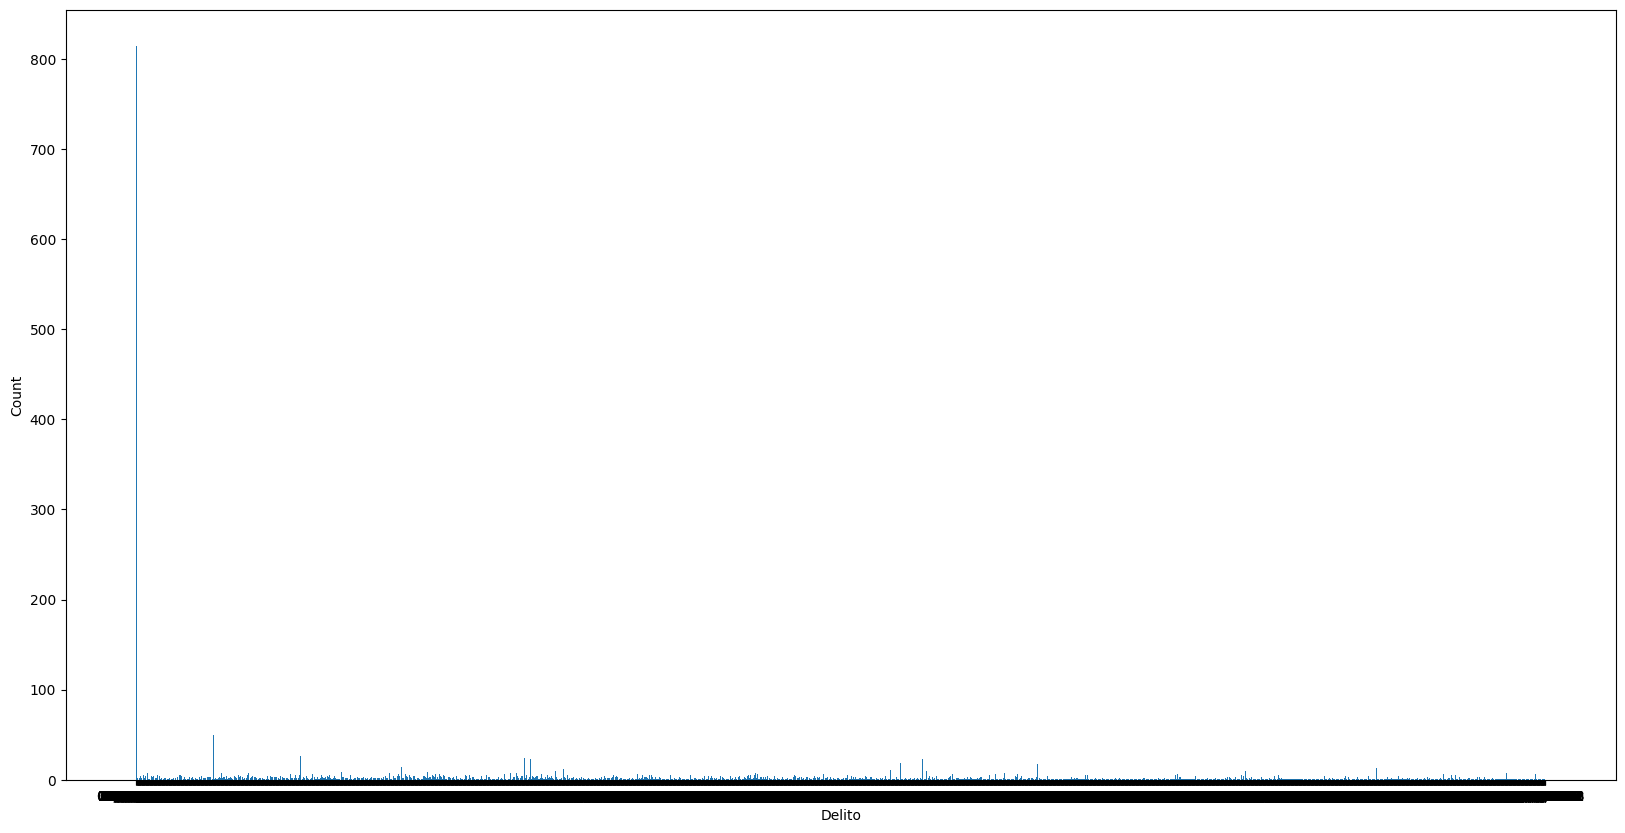

In [44]:
g = sns.FacetGrid(col='fecha',data=df,legend_out=False)

ValueError: Image size of 1584300x300 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x000001B824C43920> (for post_execute):


ValueError: Image size of 1584300x300 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1584300x300 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1.5843e+06x300 with 5281 Axes>

In [ ]:
g.map(sns.displot('total victima'))

In [42]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

ValueError: could not convert string to float: '05/03/2005'